In [3]:
from dataset.HumanLoader import HumanMattingDataset, DataLoader


data = HumanMattingDataset(split='val')

dataloader = DataLoader(data, batch_size = 4 , shuffle = True)

In [4]:
first_batch = next(iter(dataloader))

In [ ]:
first_batch[1][0].dtype

torch.float32

In [ ]:
import matplotlib.pyplot as plt
def visualize_images(tensor_images):
    tensor_images = tensor_images.cpu()
    
    np_images = tensor_images.numpy().transpose((0, 2, 3, 1))
    
    fig, axs = plt.subplots(1, tensor_images.size(0), figsize=(15, 3))
    
    for i, ax in enumerate(axs):
        # Display the image
        ax.imshow(np_images[i])
        ax.axis('off') 
    plt.show()

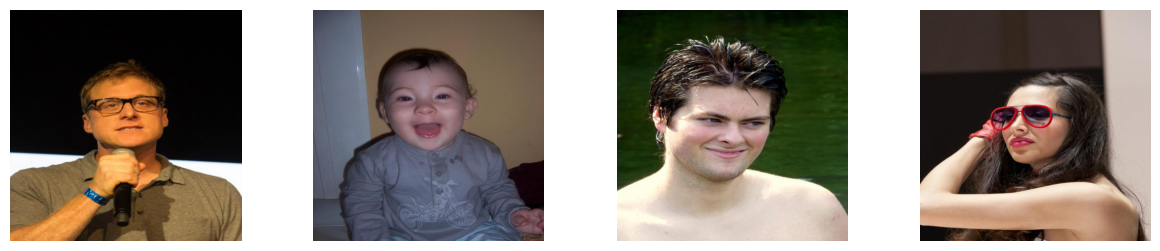

In [ ]:
visualize_images(first_batch[0])

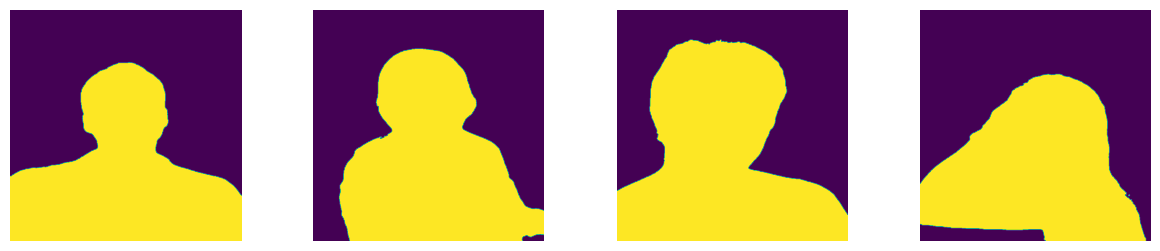

In [ ]:
visualize_images(first_batch[1])

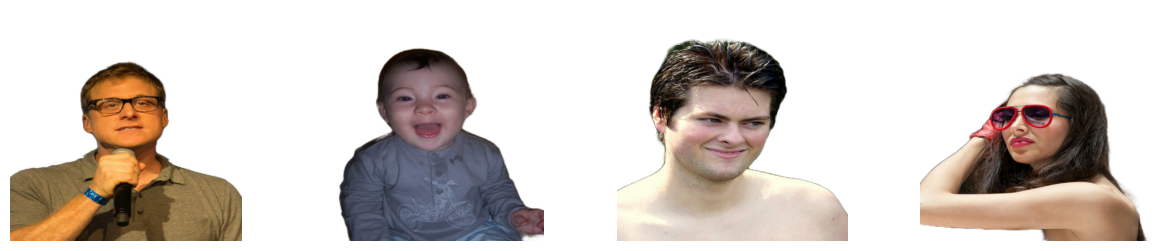

In [ ]:
visualize_images(first_batch[2])

In [ ]:
from PIL import Image
from torchvision import transforms
img = Image.open('test.jpg')

transform = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Resize((512, 512))
    ]
)
x = transform(img)
x = x.unsqueeze(0)
x.shape

d:\Program\python3.11.0\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 3, 512, 512])

In [ ]:
from model.unet import U_net
import torch
weights_dict = torch.load(r'weights/weights.pth')

In [ ]:

model = U_net(1).to(device='cuda')


# Load weights into the model
model.load_state_dict(weights_dict)

pred = model( first_batch[0].cuda())#x.repeat(2,1,1,1).cuda())


In [ ]:
# test_pred = model(x.repeat(2,1,1,1).cuda()).cuda()

In [ ]:
# test_pred = (test_pred.detach() > 0.5).float()

In [ ]:
#visualize_images(test_pred)

In [ ]:
y = (pred.detach() > 0.5).float()
#y= torch.sigmoid(pred.detach())

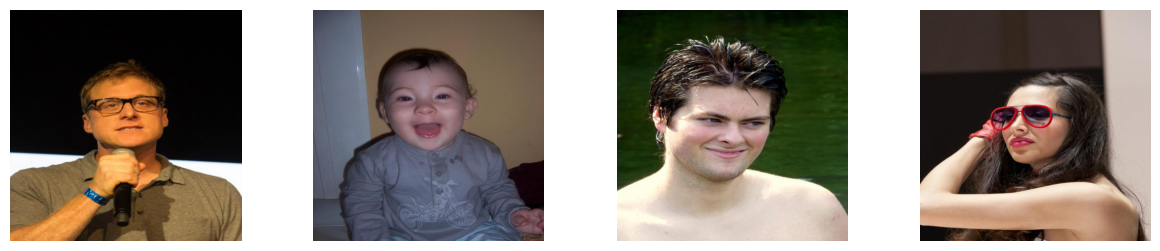

In [ ]:
visualize_images(first_batch[0])

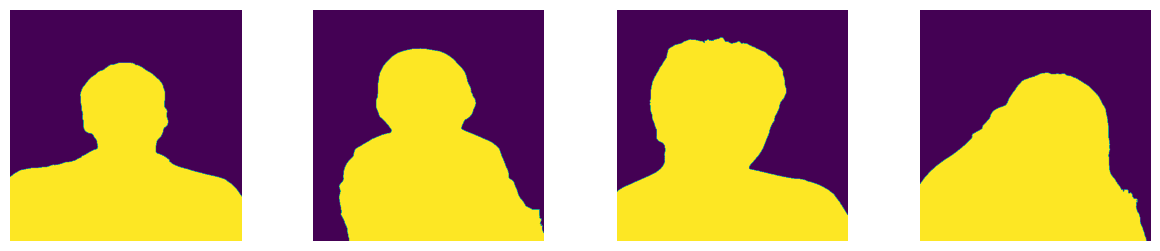

In [ ]:

visualize_images(y)

In [ ]:
weights_dict.keys()

odict_keys(['down_1.double_conv.0.weight', 'down_1.double_conv.0.bias', 'down_1.double_conv.1.weight', 'down_1.double_conv.1.bias', 'down_1.double_conv.1.running_mean', 'down_1.double_conv.1.running_var', 'down_1.double_conv.1.num_batches_tracked', 'down_1.double_conv.3.weight', 'down_1.double_conv.3.bias', 'down_1.double_conv.4.weight', 'down_1.double_conv.4.bias', 'down_1.double_conv.4.running_mean', 'down_1.double_conv.4.running_var', 'down_1.double_conv.4.num_batches_tracked', 'down_2.max_pooling_and_conv.1.double_conv.0.weight', 'down_2.max_pooling_and_conv.1.double_conv.0.bias', 'down_2.max_pooling_and_conv.1.double_conv.1.weight', 'down_2.max_pooling_and_conv.1.double_conv.1.bias', 'down_2.max_pooling_and_conv.1.double_conv.1.running_mean', 'down_2.max_pooling_and_conv.1.double_conv.1.running_var', 'down_2.max_pooling_and_conv.1.double_conv.1.num_batches_tracked', 'down_2.max_pooling_and_conv.1.double_conv.3.weight', 'down_2.max_pooling_and_conv.1.double_conv.3.bias', 'down_2.ma

In [ ]:
weights_dict['up_1.up.weight'].shape

torch.Size([1024, 512, 2, 2])

In [ ]:
weights_dict['down_1.double_conv.0.bias'].shape

torch.Size([64])

In [ ]:
img_np = first_batch[0].numpy()
img_np.shape

(4, 3, 512, 512)

In [ ]:
from numba import cuda
from numba.cuda.cudadrv import enums

device = cuda.get_current_device()
attribs = [name.replace("CU_DEVICE_ATTRIBUTE_", "") for name in dir(enums) if name.startswith("CU_DEVICE_ATTRIBUTE_")]
for attr in attribs:
    print(attr, '=', getattr(device, attr))


ASYNC_ENGINE_COUNT = 1
CAN_MAP_HOST_MEMORY = 1
CAN_USE_HOST_POINTER_FOR_REGISTERED_MEM = 0
CLOCK_RATE = 2370000
COMPUTE_CAPABILITY_MAJOR = 8
COMPUTE_CAPABILITY_MINOR = 9
COMPUTE_MODE = 0
COMPUTE_PREEMPTION_SUPPORTED = 1
CONCURRENT_KERNELS = 1
CONCURRENT_MANAGED_ACCESS = 0
COOPERATIVE_LAUNCH = 1
COOPERATIVE_MULTI_DEVICE_LAUNCH = 0
ECC_ENABLED = 0
GLOBAL_L1_CACHE_SUPPORTED = 1
GLOBAL_MEMORY_BUS_WIDTH = 128
GPU_OVERLAP = 1
HOST_NATIVE_ATOMIC_SUPPORTED = 0
INTEGRATED = 0
IS_MULTI_GPU_BOARD = 0
KERNEL_EXEC_TIMEOUT = 1
L2_CACHE_SIZE = 33554432
LOCAL_L1_CACHE_SUPPORTED = 1
MANAGED_MEMORY = 1
MAX_BLOCK_DIM_X = 1024
MAX_BLOCK_DIM_Y = 1024
MAX_BLOCK_DIM_Z = 64
MAX_GRID_DIM_X = 2147483647
MAX_GRID_DIM_Y = 65535
MAX_GRID_DIM_Z = 65535
MAX_MAX_TEXTURE_2D_MIPMAPPED_HEIGHT = 32768
MAX_PITCH = 2147483647
MAX_REGISTERS_PER_BLOCK = 65536
MAX_REGISTERS_PER_MULTIPROCESSOR = 65536
MAX_SHARED_MEMORY_PER_BLOCK = 49152
MAX_SHARED_MEMORY_PER_BLOCK_OPTIN = 101376
MAX_SHARED_MEMORY_PER_MULTIPROCESSOR = 102400
MA

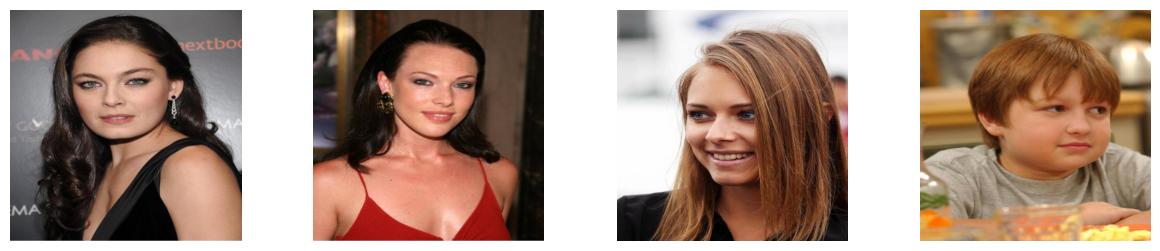

In [ ]:
dataset = HumanMattingDataset(split='val')
dataloader = DataLoader(dataset, batch_size= 4, shuffle= True)

first_val = next(iter(dataloader))
visualize_images(first_val[0])

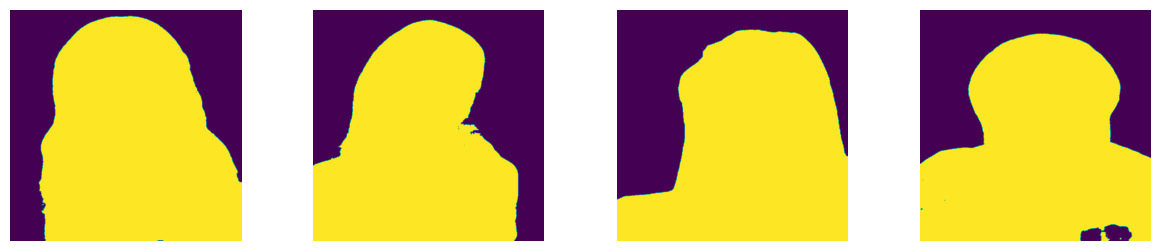

In [ ]:
visualize_images(first_val[1])

In [ ]:
model.eval()
pred = model(first_val[0].cuda())

In [ ]:
first_val[1].shape

torch.Size([4, 1, 512, 512])

In [ ]:
import numpy as np
pred = pred.detach().to('cpu')

In [ ]:
pred = torch.sigmoid(pred) >0.5

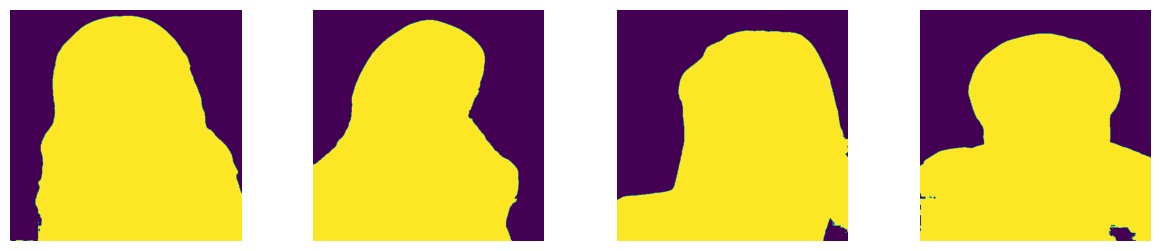

In [ ]:
visualize_images(pred)

In [ ]:
from score import iou

ret = iou(pred, first_val[1])

In [ ]:
iou_score = []
iou_score.append(ret.numpy().flatten())
np.mean(iou_score)

0.9821187

In [ ]:
import numpy as np
a = [0.1235,-1.203, 0.129]
a =np.array(a,dtype= np.float32)
a = a.astype(np.float16)
a

array([ 0.1235, -1.203 ,  0.129 ], dtype=float16)